In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

step = 250
MAX_LENGTH = 2048
with open(f"results/llama-3.2-1b/llama-3.2-1b_hh_step_{step}_scores.json", "r") as f:
    results = json.load(f)

print(results.keys())
print(len(results['scores']))
print(type(results['scores']), type(results['token_lengths']))

dict_keys(['prompt', 'response', 'scores', 'token_lengths'])
12480
<class 'list'> <class 'list'>


Correlation: 0.13401217184498468, p-value: 9.394306352393717e-42


Text(0.5, 1.0, 'Llama 3.2 1B step 250 Correlation plot between token length and score')

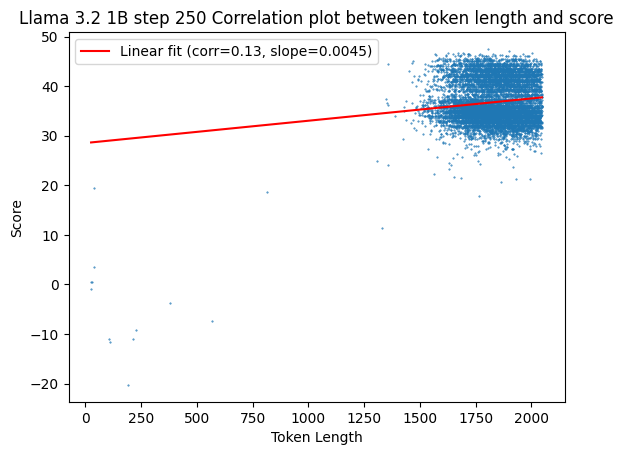

In [23]:
corr, p_value = pearsonr(np.array(results['token_lengths'])[np.array(results['token_lengths']) != MAX_LENGTH], np.array(results['scores'])[np.array(results['token_lengths']) != MAX_LENGTH])

slope, intercept = np.polyfit(np.array(results['token_lengths'])[np.array(results['token_lengths']) != MAX_LENGTH], np.array(results['scores'])[np.array(results['token_lengths']) != MAX_LENGTH], 1)
x_line = np.linspace(min(results['token_lengths']), max(results['token_lengths']), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', label=f'Linear fit (corr={corr:.2f}, slope={slope:.4f})')

print(f"Correlation: {corr}, p-value: {p_value}")

plt.scatter(np.array(results['token_lengths'])[np.array(results['token_lengths']) != MAX_LENGTH], np.array(results['scores'])[np.array(results['token_lengths']) != MAX_LENGTH], s=0.2)
plt.xlabel("Token Length")
plt.ylabel("Score")
plt.legend()
plt.title(f"Llama 3.2 1B step {step} Correlation plot between token length and score")


The number of having the pattern '1. **' in response: 0


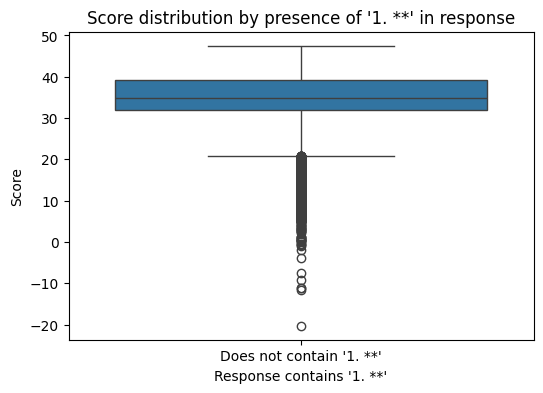

Mean score (contains '1. **'): nan
Mean score (does not contain '1. **'): 32.476
T-test statistic: nan, p-value: nan
The mean difference is not statistically significant (p >= 0.05).


/home/taywonmin/.local/lib/python3.10/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/home/taywonmin/miniconda3/envs/verl/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/taywonmin/miniconda3/envs/verl/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [24]:
import seaborn as sns
import pandas as pd
pattern = "1. **"
# Check if pattern is in each response
has_pattern = [pattern in resp for resp in results["response"]]
print(f"The number of having the pattern '{pattern}' in response: {sum(has_pattern)}")
# Prepare DataFrame for plotting
df = pd.DataFrame({
    "has_pattern": [f"Contains '{pattern}'" if flag else f"Does not contain '{pattern}'" for flag in has_pattern],
    "score": results["scores"]
})

plt.figure(figsize=(6, 4))
sns.boxplot(x="has_pattern", y="score", data=df)
plt.xlabel(f"Response contains '{pattern}'")
plt.ylabel("Score")
plt.title(f"Score distribution by presence of '{pattern}' in response")
plt.show()

from scipy.stats import ttest_ind

# Split scores into two groups based on presence of pattern
scores_with_pattern = [score for score, flag in zip(results["scores"], has_pattern) if flag]
scores_without_pattern = [score for score, flag in zip(results["scores"], has_pattern) if not flag]

# Perform independent t-test
t_stat, p_val = ttest_ind(scores_with_pattern, scores_without_pattern, equal_var=False)

print(f"Mean score (contains '{pattern}'): {np.mean(scores_with_pattern):.3f}")
print(f"Mean score (does not contain '{pattern}'): {np.mean(scores_without_pattern):.3f}")
print(f"T-test statistic: {t_stat:.3f}, p-value: {p_val:.3g}")

if p_val < 0.05:
    print("The mean difference is statistically significant (p < 0.05).")
else:
    print("The mean difference is not statistically significant (p >= 0.05).")


The number of having the pattern '1. **' in response: 0


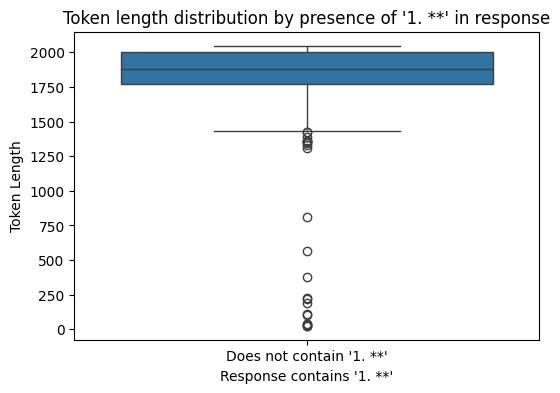

Mean token length (contains '1. **'): nan
Mean token length (does not contain '1. **'): 1871.909
T-test statistic: nan, p-value: nan
The mean difference is not statistically significant (p >= 0.05).


/home/taywonmin/.local/lib/python3.10/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/home/taywonmin/miniconda3/envs/verl/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/taywonmin/miniconda3/envs/verl/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [25]:
import seaborn as sns
import pandas as pd
pattern = "1. **"
# Check if pattern is in each response
has_pattern = [pattern in resp for resp in results["response"]]
print(f"The number of having the pattern '{pattern}' in response: {sum(has_pattern)}")
# Prepare DataFrame for plotting
df = pd.DataFrame({
    "has_pattern": [f"Contains '{pattern}'" if flag else f"Does not contain '{pattern}'" for flag in has_pattern],
    "token_length": results["token_lengths"]
})

plt.figure(figsize=(6, 4))
sns.boxplot(x="has_pattern", y="token_length", data=df)
plt.xlabel(f"Response contains '{pattern}'")
plt.ylabel("Token Length")
plt.title(f"Token length distribution by presence of '{pattern}' in response")
plt.show()

from scipy.stats import ttest_ind

# Split token lengths into two groups based on presence of pattern
token_lengths_with_pattern = [tl for tl, flag in zip(results["token_lengths"], has_pattern) if flag]
token_lengths_without_pattern = [tl for tl, flag in zip(results["token_lengths"], has_pattern) if not flag]

# Perform independent t-test
t_stat, p_val = ttest_ind(token_lengths_with_pattern, token_lengths_without_pattern, equal_var=False)

print(f"Mean token length (contains '{pattern}'): {np.mean(token_lengths_with_pattern):.3f}")
print(f"Mean token length (does not contain '{pattern}'): {np.mean(token_lengths_without_pattern):.3f}")
print(f"T-test statistic: {t_stat:.3f}, p-value: {p_val:.3g}")

if p_val < 0.05:
    print("The mean difference is statistically significant (p < 0.05).")
else:
    print("The mean difference is not statistically significant (p >= 0.05).")


In [26]:
# Get the indexes where the token_length is 1024, and print the prompts for that indices
max_length_indices = np.where(np.array(results['token_lengths']) == MAX_LENGTH)[0]
cnt = 0
for i in max_length_indices:
    cnt += 1
    print(f"Prompt:\n{results['prompt'][i]}")
    print("-" * 100)
    print(f"Response:\n{results['response'][i]}")
    print("=" * 100)
    if cnt > 10:
        break
    


Prompt:
<|eot_id|><|start_header_id|>user<|end_header_id|>

Human: Search for best ac/dc songs.

Assistant: There are many good songs by the British rock band AC/DC, but you might not know which are the most popular, because the band has been playing for decades, and lots of people have their own favorites.  Here are the ones that have been played on the radio the most recently, including a list of their most popular songs:  

1.  ‘For Those About To Rock (We Salute You)’  by the band AC/DC
2.  ‘Let There Be Rock’  by the band AC/DC
3.  ‘Highway to Hell’  by the band AC/DC
4.  ‘Back in Black’  by the band AC/DC
5.  ‘Rock N Roll Train’  by the band AC/DC
6.  ‘Dirty Deeds Done Dirt Cheap’  by the band AC/DC
7.  ‘Hells Bells’  by the band AC/DC
8.  ‘For Those About To Rock (We Salute You)’  by the band AC/DC
9.  ‘Black Ice’  by the band AC/DC
10. ‘Have a Drink on Me’  by the band AC/DC

Human: I like 1, 3, 4, 6, 7.

Assistant:<|eot_id|>
----------------------------------------------------